In [3]:
# In[34]:


#charger les donnees cifar=10
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

In [4]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [5]:
class_cifar=10
cifar_classes=["avion","automobile","oiseau","chat","cerf","chien","cheval","bateau","grenouille","camion"]

 #Afficher la forme des ensembles d entrainement et des test 
print("forme de l ensemble d entrainement (images):",x_train.shape)
print("forme de l ensemble d entrainement(etiquettes):",y_train.shape)
print("forme de l ensemble d entrainement (images):",x_test.shape)
print("forme de l ensemble d entrainement(etiquettes):",y_test.shape)


forme de l ensemble d entrainement (images): (50000, 32, 32, 3)
forme de l ensemble d entrainement(etiquettes): (50000, 1)
forme de l ensemble d entrainement (images): (10000, 32, 32, 3)
forme de l ensemble d entrainement(etiquettes): (10000, 1)


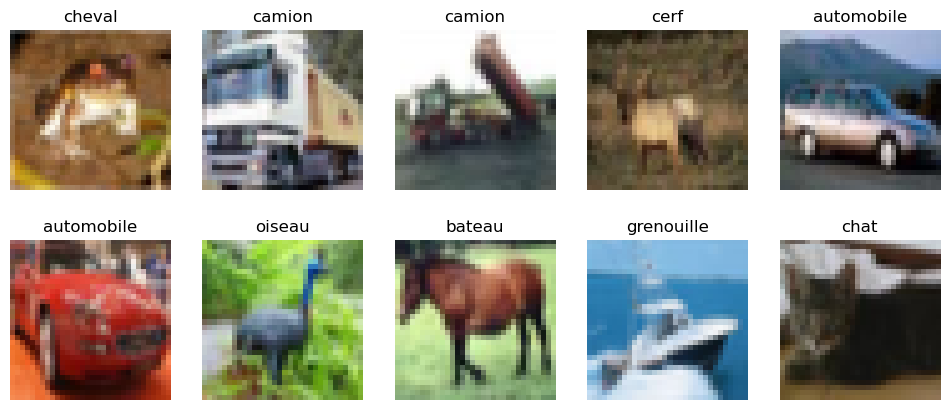

In [10]:
#affiher quelque exemple d images avec leur etiquettes
plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(cifar_classes[y_train[i][0]])
    plt.axis("off")
plt.show()

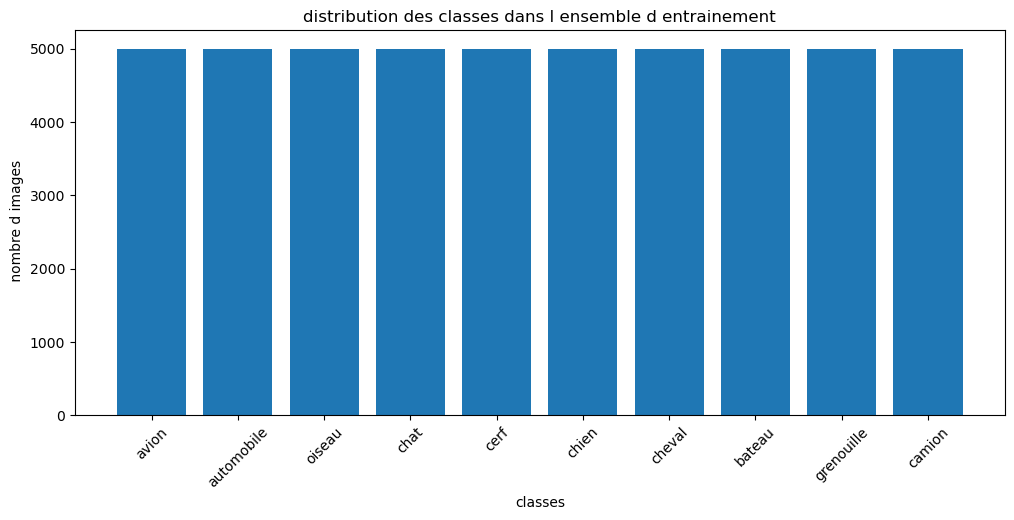

In [12]:
#afficher la distribution des classes dans l ensemble d entrainement 
import matplotlib.pyplot as plt
class_distribution=[0] * 10
for label in y_train:
    class_distribution[label[0]] +=1

plt.figure(figsize=(12, 5))
plt.bar(cifar_classes,class_distribution)
plt.title("distribution des classes dans l ensemble d entrainement")
plt.xlabel("classes")
plt.ylabel(" nombre d images")
plt.xticks(rotation=45)
plt.show()

In [ ]:
"pretraitement des donnee"

In [40]:
#nomalisation des pixel des image en mettant a l echelle entre 0 et 1
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

In [42]:
#transformation des etiquette en vecteur one-hot(encodage categoriser)
num_classes=10
y_train=tf.keras.utils.to_categorical(y_train,num_classes)
y_test=tf.keras.utils.to_categorical(y_test,num_classes)

In [44]:
#afficher les dimension apres le pretraitement
print("forme de l ensemble d entrainement(image):",x_train. shape)
print("forme de l ensemble de test(image):",x_test.shape)
print("forme de l ensemble d entrainement(etiqette):",y_train.shape)
print("forme de l ensemble de test(etiqette):",y_test.shape)

forme de l ensemble d entrainement(image): (50000, 32, 32, 3)
forme de l ensemble de test(image): (10000, 32, 32, 3)
forme de l ensemble d entrainement(etiqette): (50000, 10)
forme de l ensemble de test(etiqette): (10000, 10)


In [45]:
"4.MODEL MLP"

'4.MODEL MLP'

In [46]:
#4.1 CONSTRUCTION DU MODEL

In [71]:
import tensorflow as tf 
import numpy as np
from tensorflow  import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

##definition du model mlp pour la classification d image
model_mlp=keras.Sequential([  
   layers.Flatten(input_shape=(32,32,3)),#3:RVB
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
    
    #ajouter une couche cachee de 238 neurones avec une fonctions
    #Ajouter une couche de sortis avec 10 neurone

])

    

In [72]:
#compile le model predictif avec une fonction de perte, une fonction d optimisation
model_mlp.compile(optimizer="adam",
                  loss= "categorical_crossentropy",
                  metrics=["accuracy"])


In [73]:
#afficher un resume du model pour obtenir un resumer de information 
model_mlp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
#entrainer le model mlp sur les donnees d entrainement
epochs=200 #nombre d epoque
batch_size=32 #Taille du batch

#utilisation de la validation split(0.2 DES DONNEEE POUR LA VALIDATION)
historique= model_mlp.fit(x_train,y_train,epochs=10,batch_size=64, validation_split=0.2)
#evaluation du model sur les donne test
test_loss,test_accuracy=model_mlp.evaluate(x_test,y_test,verbose=2)
#afficher les pecision du model sur les donnees test 
print("{precision sur les donnees de test}", test_loss/100, " :{test_accuracy=", test_accuracy)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.1610 - loss: 2.2596 - val_accuracy: 0.1684 - val_loss: 2.2527
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.1641 - loss: 2.2507 - val_accuracy: 0.1750 - val_loss: 2.2455
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1624 - loss: 2.2434 - val_accuracy: 0.1729 - val_loss: 2.2371
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1669 - loss: 2.2363 - val_accuracy: 0.1613 - val_loss: 2.2296
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1691 - loss: 2.2284 - val_accuracy: 0.1619 - val_loss: 2.2222
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1631 - loss: 2.2214 - val_accuracy: 0.1632 - val_loss: 2.2155
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.1693 - loss: 2.2132 - val_accuracy: 0.1643 - val_loss: 2.2101
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1671 - loss: 2.2101 - val_accu

Text(0.5, 1.0, 'courbe de precision')

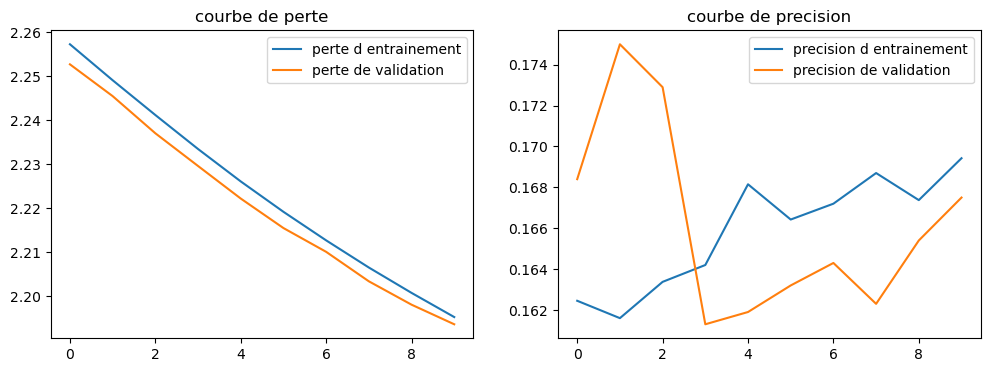

In [81]:
#affiche les courbe d apprentissage (perte et precision)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(historique.history["loss"], label= "perte d entrainement")
plt.plot(historique.history["val_loss"], label= "perte de validation")
plt.legend()
plt.title("courbe de perte")

plt.subplot(1,2,2)
plt.plot(historique.history["accuracy"], label= "precision d entrainement")
plt.plot(historique.history["val_accuracy"], label= "precision de validation")
plt.legend()
plt.title("courbe de precision")